<a href="https://colab.research.google.com/github/V-Vedant-V/Is-it-a-cat-or-dog-/blob/main/Is_it_a_cat_or_dog%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!pip install ddgs

In [49]:
from ddgs import DDGS
from fastcore.all import L

def search_images(keywords, max_images=200):
  return L(DDGS().images(keywords, max_images=max_images)).itemgot('image')

In [50]:
url = search_images('cat', max_images=1)

In [51]:
dest = 'cat.jpg'
from fastdownload import download_url
download_url(url[0], dest, show_progress=False)

Path('cat.jpg')

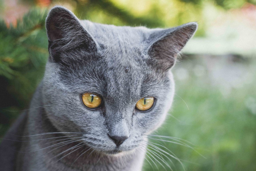

In [52]:
from PIL import Image
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

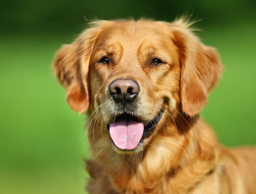

In [53]:
dest = 'dog.jpg'
download_url(search_images('dog', max_images=1)[0], dest, show_progress=False)
im = Image.open(dest)
im.to_thumb(256, 256)

In [54]:
searches = ('cat', 'dog')
path = Path('cat_or_dog')

for i in searches:
  dest = (path/i)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(i, max_images=200))

In [55]:
failed = verify_images(get_image_files(path))
len(failed)

0

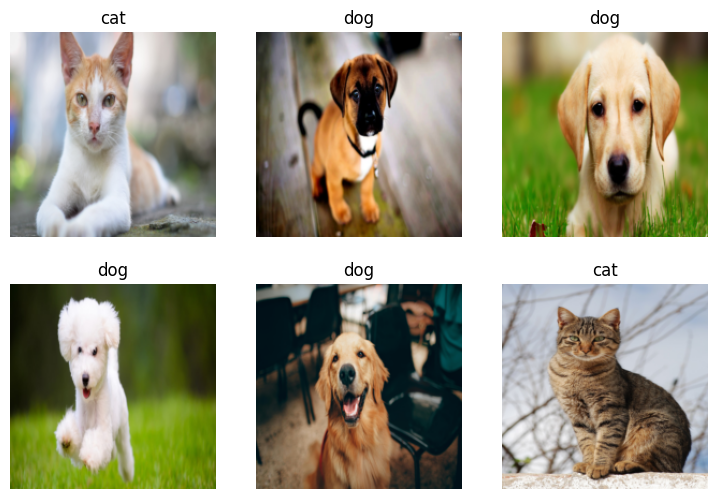

In [56]:
dls = DataBlock(blocks = (ImageBlock, CategoryBlock),
                get_items=get_image_files,
                splitter=RandomSplitter(valid_pct=0.2, seed=42),
                get_y=parent_label,
                item_tfms=Resize(192, method='squish')
                ).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [57]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.841159,0.428146,0.153846,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.797877,0.303609,0.153846,00:05
1,0.644927,0.037659,0.000000,00:06
2,0.438949,0.007446,0.000000,00:05


In [59]:
is_cat_or_dog, _, prob = learn.predict(PILImage.create('cat.jpg'))
print(f'this image is of a {is_cat_or_dog}')
print(f'probability: {prob[0]:.4f}')

this image is of a cat
probability: 1.0000
